In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import h5py
import sys
sys.path.append('./../data/')
from makeCorner import *
sys.path.append("./../code/")
from piCurve import *
from makeDelayedRateData import *
from scipy.special import gammainc
import population_parameters

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [2]:
# Load datafile
results = h5py.File("./../data/birefringence_variable_evolution.hdf","r")

# Read out relevant posterior samples
R0s = results['result']['R0'][()]
alphas = results['result']['alpha'][()]
betas = results['result']['beta'][()]
zps = results['result']['zp'][()]
zMaxs = results['result']['zMax'][()]

In [3]:
# Set up grids of redshifts and merger rates
zs = np.linspace(0,17,1000)
Rzs = np.zeros((R0s.size,zs.size))

# Loop across posterior samples and compute R(z) traces
for i in range(R0s.size):
    
    # Extract parameters
    R0 = R0s[i]
    alpha = alphas[i]
    beta = betas[i]
    zp = zps[i]
    zMax = zMaxs[i]
    
    # Construct normalized rate
    Rzs[i,:] = (1.+zs)**alpha/(1.+((1.+zs)/(1.+zp))**(alpha+beta))
    Rzs[i,:] *= R0/Rzs[i,0]
    
    # Apply smoothing truncation
    truncation = np.exp(-(zs-zMax)**2/(2.*0.25**2))
    Rzs[i,:] = np.where(zs<zMax,Rzs[i,:],Rzs[i,:]*truncation)

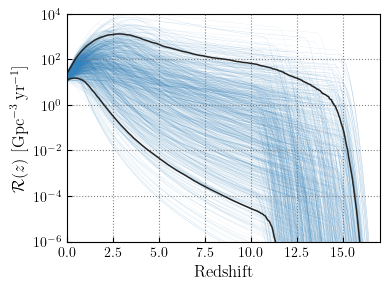

In [4]:
fig,ax = plt.subplots(figsize=(4,3))

ax.set_rasterization_zorder(1)
for i in np.random.choice(np.arange(Rzs.shape[0]),size=1000):
    ax.plot(zs,Rzs[i,:],color='#3182bd',lw=0.2,alpha=0.15,zorder=0)
    
ax.plot(zs,np.quantile(Rzs,0.95,axis=0),color='#252525',lw=1.1)
ax.plot(zs,np.quantile(Rzs,0.05,axis=0),color='#252525',lw=1.1)

ax.set_yscale('log')
ax.set_xlim(0,17)
ax.set_ylim(1e-6,1e4)
ax.set_xlabel('Redshift')
ax.set_ylabel('$\mathcal{R}(z)\,\,[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$')

plt.tight_layout()
plt.savefig('figure_08.pdf',bbox_inches='tight',dpi=200)
plt.show()